<a href="https://colab.research.google.com/github/SanBartolome/IA-diploma-course-2021/blob/main/SanBartolome_Carlos_F1227845_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico 5
- Shapefiles de Perú obtenidos de: https://data.humdata.org/dataset/limites-de-peru
- Datos del Catastro Forestal obtenidos de: https://www.datosabiertos.gob.pe/dataset/catastro-forestal-nivel-nacional-serfor

## 1. Importar shapefiles

### 1.1 Perú: Niveles administrativos (0-3)
Nota: No utilizará todos los niveles para este TP

In [2]:
!pip install geopandas
!pip install pandas
!pip install matplotlib
!pip install pandas fiona shapely pyproj rtree

     |████████████████████████████████| 994 kB 4.4 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 
     |████████████████████████████████| 994 kB 4.2 MB/s 


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
peru = gpd.read_file('Peru/per_admbnda_adm0_ign_20200714.shp') 
peru

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,ADM0ALT1ES,ADM0ALT2ES,date,validOn,validTo,geometry
0,100.651448,106.181646,Peru,Perú (el),PE,Peru (el),None,None,None,None,2015-07-24,2020-07-14,None,"MULTIPOLYGON (((-68.81422 -16.34799, -68.91839..."


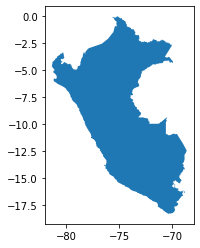

In [3]:
peru.plot()

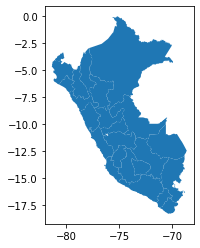

In [4]:
regiones = gpd.read_file('Peru/per_admbnda_adm1_ign_20200714.shp') 
regiones.plot()

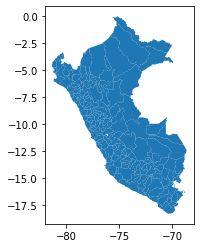

In [5]:
provincias = gpd.read_file('Peru/per_admbnda_adm2_ign_20200714.shp') 
provincias.plot()

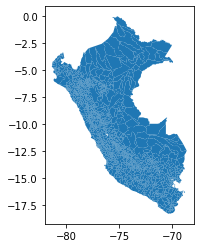

In [6]:
distritos = gpd.read_file('Peru/per_admbnda_adm3_ign_20200714.shp') 
distritos.plot()

### 1.2 Catastro Forestal Marzo 2017

In [7]:
bpp = gpd.read_file('Catastro/bpp.shp') 
bpp.head()

,ZONA,TIPO,DENOMIN,AREA_SIG,REGION,DOC_LEGAL,geometry
0,ZONA 1D,BOSQUE DE PRODUCCION PERMANENTE,BPP,16282.80,SAN MARTIN,R.J Nº 313-2006-INRENA,"POLYGON ((419771.413 9274607.681, 421289.786 9..."
1,ZONA 1A,BOSQUE DE PRODUCCION PERMANENTE,BPP,5293.30,SAN MARTIN,R.J Nº 313-2006-INRENA,"POLYGON ((341744.633 9333986.113, 340988.043 9..."
2,ZONA 1E,BOSQUE DE PRODUCCION PERMANENTE,BPP,47648.05,SAN MARTIN,R.J Nº 313-2006-INRENA,"POLYGON ((432700.443 9299827.712, 432700.443 9..."
3,ZONA 3A-2 (PICOTA),BOSQUE DE PRODUCCION PERMANENTE,BPP,22918.89,SAN MARTIN,R.J Nº 313-2006-INRENA,"POLYGON ((388265.374 9217192.416, 388222.093 9..."
4,ZONA 3A-1 (BELLAVISTA),BOSQUE DE PRODUCCION PERMANENTE,BPP,204.58,SAN MARTIN,R.J Nº 313-2006-INRENA,"POLYGON ((363211.365 9216665.780, 363000.000 9..."


# PARTE 1

a) Identifique el tipo de proyección utilizada en el dataframe *regiones* (sugerencia: utilice *crs*)

In [8]:
regiones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

b) Identifique el tipo de proyección utilizada en el dataframe *bpp* (sugerencia: utilice *crs*)

In [9]:
bpp.crs

<Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

c) Cree una reproyeccción de *bpp* de manera que utilice el mismo tipo de proyeccióon que *regiones*

In [10]:
bpp_new = bpp.to_crs(epsg = 4326)

d) Grafique el mapa del Perú en fondo blanco y dividido en regiones (utilice color de línea gris). Sobre este mapa, grafique los *Bosques de Producción Permanente* (bpp) en color verde y con 50% de transparencia (alpha=0.5).

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


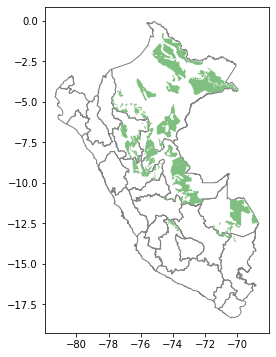

In [37]:
fig, ax = plt.subplots(figsize = (8,6))
regiones.plot(ax = ax, color = "white", edgecolor = 'gray', column = 'ADM1_ES')

#reproject
bpp_new.plot(ax = ax, color = '#7FBF7F', linewidth = 0)

## PARTE 2

a) Cree una nueva columna en el dataframe *regiones*. Esta columna debe contener el nombre de la región en minúsculas

In [38]:
#Este ejemplo puede resultar de utilidad:
df = pd.DataFrame({'col1': ['Amazonas', 'Madre de Dios','Lima'], 'col2': [3, 4, 5]})
df

,col1,col2
0,Amazonas,3
1,Madre de Dios,4
2,Lima,5


In [39]:
df['col3'] = df.col1.str.lower()
df

,col1,col2,col3
0,Amazonas,3,amazonas
1,Madre de Dios,4,madre de dios
2,Lima,5,lima


In [40]:
regiones.head(2)

,Shape_Leng,Shape_Area,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,12.894071,3.203362,Amazonas,PE01,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,11.640227,2.954639,Ancash,PE02,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."


In [41]:
#creación de la nueva columna en el df "regiones"
regiones['ADM1_ES_MIN'] = regiones.ADM1_ES.str.lower()
regiones.head(2)

,Shape_Leng,Shape_Area,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry,ADM1_ES_MIN
0,12.894071,3.203362,Amazonas,PE01,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",amazonas
1,11.640227,2.954639,Ancash,PE02,None,None,None,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",ancash


b) A partir de *regiones*, cree 2 dataframes según las listas mostradas en el notebook:
- regiones_costa
- regiones_no_costa

In [42]:
costa = ['tumbes','piura','lambayeque','la libertad','ancash','lima','ica','arequipa','moquegua','tacna','callao']
no_costa = ['cajamarca','huanuco','pasco','junin','huancavelica','ayacucho','apurimac','puno','cusco','loreto','amazonas','madre de dios','san martin','ucayali']

In [43]:
#Este ejemplo puede resultar de utilidad:
df2 = df.loc[df['col3'].isin(['amazonas','madre de dios'])]
df2

,col1,col2,col3
0,Amazonas,3,amazonas
1,Madre de Dios,4,madre de dios


In [44]:
#creación de los 3 dataframes solicitados
regiones_costa = regiones.loc[regiones['ADM1_ES_MIN'].isin(costa)]
regiones_no_costa = regiones.loc[regiones['ADM1_ES_MIN'].isin(no_costa)]
bpp_new = bpp.to_crs(epsg = 4326)

c) Grafique nuevamente el mapa del Perú, pero esta vez coloree las regiones de la costa de un color diferente. Sobre el mapa, grafique los Bosques de Producción Permanente.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


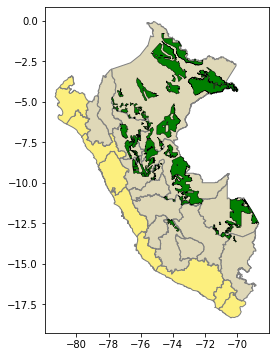

In [51]:
#realización del mapa
fig, ax = plt.subplots(figsize = (8,6))
regiones_costa.plot(ax = ax, color = "#FCEF7E", edgecolor = 'gray', column = 'ADM1_ES_MIN')

#reproject
regiones_no_costa.plot(ax = ax, color = "#DFD8B8", edgecolor = 'gray', column = 'ADM1_ES_MIN')

#reproject2
bpp_new.plot(ax = ax, color = 'green', edgecolor = "black", linewidth = 0.5)